# Recurrent Neural Network

#### Code Source: Udemy: Deep Learning A-Z: Hands on Artificial Neural Networks

## Part 1 - Data Preprocessing

### Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [20]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [22]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Initialising the RNN

In [31]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [32]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [33]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [34]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [35]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [36]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [37]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [38]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

### Fitting the RNN to the Training set

In [39]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 82ms/step - loss: 0.0821
Epoch 2/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0055
Epoch 10/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0050
Epoch 12/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0038
Epoch 13/100
38/38 [====

38/38 [==============================] - 3s 81ms/step - loss: 0.0017
Epoch 100/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0013


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [40]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [41]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

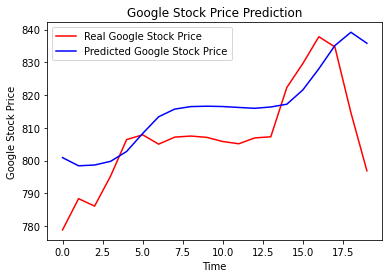

In [42]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()